# Libraries

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.python.client import device_lib
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import pickle
from tqdm import tqdm
import numpy as np
from sklearn.metrics import f1_score
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score

# 1. Reading and Analysing DataFrame

In [ ]:
data = pd.read_csv('data.tsv', sep="\t")

In [ ]:
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [ ]:
data.label.value_counts()

real    3361
fake    3060
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
x = data['tweet']
y = data['label']
# print(x)

In [ ]:
X_train, X_valid_test, Y_train, Y_valid_test = train_test_split(x, y,test_size=0.05, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train,test_size=0.05, random_state=42)

train_df = pd.DataFrame(data = {'data': X_train, 'label': Y_train})
test_df = pd.DataFrame(data = {'data': X_test, 'label': Y_test})
dev_df = pd.DataFrame(data = {'data': X_valid_test, 'label': Y_valid_test})

In [ ]:
# test_df

In [ ]:
train_df.columns = ['tweet', 'label']
dev_df.columns = ['tweet', 'label']
test_df.columns = ['tweet', 'label']

In [ ]:
train_df.head()

,tweet,label
3985,Coronavirus: 6000 new cases a day reported in ...,real
1262,“With the expanded national case definition a...,real
5895,Update from @minhealthnz Today there is 1 new ...,real
240,First there’ll be some changes in how we track...,real
40,We launched the #COVID19 Solidarity Response F...,real


In [ ]:
dev_df.head()

,tweet,label
324,"Canada’s top BDSM doctor says wear a mask, lea...",fake
1340,There are 3 cases considered to have recovered...,real
6026,#CoronaVirusUpdates: State-wise details of Tot...,real
2077,India records its highest single-day increase ...,fake
381,Researchers warned of a ticking coronavirus ti...,real


In [ ]:
test_df.head()

,tweet,label
4006,"CDC Says Despite Rumors, Mimes Not Safe From C...",fake
5749,RT @MoHFW_INDIA: #IndiaFightsCorona India has ...,real
443,API users beware: there is a major caveat in t...,real
4244,38 % of Americans won't buy Corona beer due to...,fake
598,The coronavirus disease is caused by a bacteri...,fake


In [ ]:
# Analysing train dataframe attributes 
print('* Size of dataframe: {}\n'.format(train_df.shape))
print('* Datatype of columns are:\n {}\n'.format(train_df.dtypes))
print('* Count of different categories:\n {}\n'.format(train_df['label'].value_counts()))
print('* Number of NaNs among text are: {}\n'.format(train_df['tweet'].isnull().sum()))

# Converting text to string
train_df['tweet'] = train_df['tweet'].astype(str)

# Removing NaNs
train_df = train_df.dropna(subset=['tweet'])
print('NaNs are removed from the dataframe. Number of NaNs can be confirmed to be {}. The size of dataframe has reduced to {}'.format(train_df['tweet'].isnull().sum(), train_df.shape))

# Analysing dev dataframe attributes 
print('* Size of dataframe: {}\n'.format(dev_df.shape))
print('* Datatype of columns are:\n {}\n'.format(dev_df.dtypes))
print('* Count of different categories:\n {}\n'.format(dev_df['label'].value_counts()))
print('* Number of NaNs among text are: {}\n'.format(dev_df['tweet'].isnull().sum())) 

# Converting text to string
dev_df['tweet'] = dev_df['tweet'].astype(str)

# Removing NaNs
dev_df = dev_df.dropna(subset=['tweet'])
print('NaNs are removed from the dataframe. Number of NaNs can be confirmed to be {}. The size of dataframe has reduced to {}'.format(dev_df['tweet'].isnull().sum(), dev_df.shape))

# Analysing test dataframe attributes 
print('* Size of dataframe: {}\n'.format(test_df.shape))
print('* Datatype of columns are:\n {}\n'.format(test_df.dtypes))
print('* Count of different categories:\n {}\n'.format(test_df['label'].value_counts()))
print('* Number of NaNs among text are: {}\n'.format(test_df['tweet'].isnull().sum()))

# Converting text to string
test_df['tweet'] = test_df['tweet'].astype(str)

# Removing NaNs
test_df = test_df.dropna(subset=['tweet'])
print('NaNs are removed from the dataframe. Number of NaNs can be confirmed to be {}. The size of dataframe has reduced to {}'.format(test_df['tweet'].isnull().sum(), test_df.shape))

* Size of dataframe: (5794, 2)

* Datatype of columns are:
 tweet    object
label    object
dtype: object

* Count of different categories:
 real    3047
fake    2747
Name: label, dtype: int64

* Number of NaNs among text are: 0

NaNs are removed from the dataframe. Number of NaNs can be confirmed to be 0. The size of dataframe has reduced to (5794, 2)
* Size of dataframe: (322, 2)

* Datatype of columns are:
 tweet    object
label    object
dtype: object

* Count of different categories:
 real    174
fake    148
Name: label, dtype: int64

* Number of NaNs among text are: 0

NaNs are removed from the dataframe. Number of NaNs can be confirmed to be 0. The size of dataframe has reduced to (322, 2)
* Size of dataframe: (305, 2)

* Datatype of columns are:
 tweet    object
label    object
dtype: object

* Count of different categories:
 fake    165
real    140
Name: label, dtype: int64

* Number of NaNs among text are: 0

NaNs are removed from the dataframe. Number of NaNs can be confirme

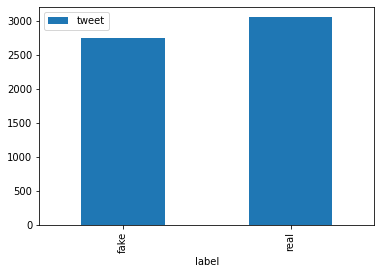

In [ ]:
# Plotting label value counts
train_df.groupby('label').count().plot(kind='bar')
plt.show()

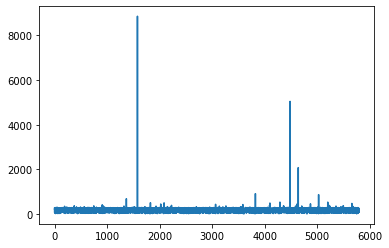

In [ ]:
# Plotting word lenghts of train text
train_word_length = [len(x) for x in train_df['tweet']]
plt.plot(train_word_length)

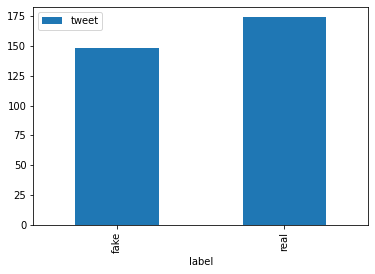

In [ ]:
# Plotting label value counts
dev_df.groupby('label').count().plot(kind='bar')
plt.show()

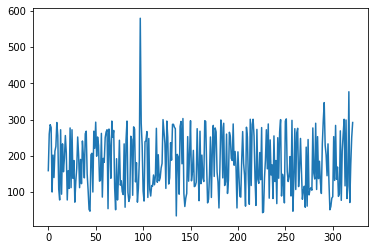

In [ ]:
# Plotting word lenghts of train text
dev_word_length = [len(x) for x in dev_df['tweet']]
plt.plot(dev_word_length)

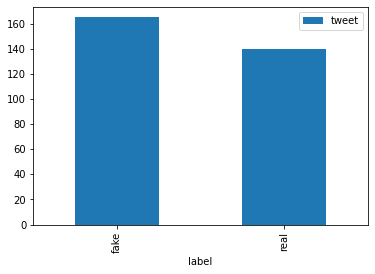

In [ ]:
# Plotting label value counts
test_df.groupby('label').count().plot(kind='bar')
plt.show()

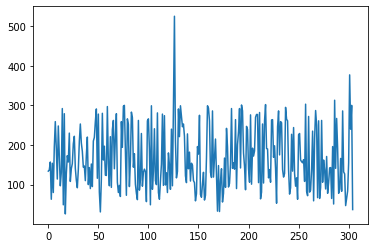

In [ ]:
# Plotting word lenghts of train text
test_word_length = [len(x) for x in test_df['tweet']]
plt.plot(test_word_length)

# 5. Label Encoding

In [ ]:
# Declaring train labels
train_labels = train_df['label']
valid_labels = dev_df['label']
test_labels = test_df['label']

In [ ]:
# Converting labels to numerical features
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
valid_labels = le.transform(valid_labels)
test_labels = le.transform(test_labels)

print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(valid_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

['fake' 'real']
(array([0, 1]), array([2747, 3047]))
(array([0, 1]), array([148, 174]))
(array([0, 1]), array([165, 140]))


In [ ]:
# Changing labels to categorical features
import numpy as np
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import numpy as np

train_labels = to_categorical(np.asarray(train_labels))
valid_labels = to_categorical(np.asarray(valid_labels))
test_labels = to_categorical(np.array(test_labels))

In [ ]:
labels_count = train_df['label'].value_counts()
labels_count = len(labels_count)

# 6. Tokenizing Sentences and Fixing Sentence Length

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Defining training parameters
max_sequence_length = 170   
max_words = 30000   

# Tokenizing tweets/sentences wrt num_words
tokenizer = Tokenizer(num_words = max_words)  # Selects most frequent words 
tokenizer.fit_on_texts(train_df.tweet)      # Develops internal vocab based on training text
train_sequences = tokenizer.texts_to_sequences(train_df.tweet)  # converts text to sequence

valid_sequences = tokenizer.texts_to_sequences(dev_df.tweet)
test_sequences = tokenizer.texts_to_sequences(test_df.tweet)

In [ ]:
# Fixing the sequence length 
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_data = pad_sequences(train_sequences, maxlen = max_sequence_length)
valid_data = pad_sequences(valid_sequences, maxlen = max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen = max_sequence_length)
train_data.shape, valid_data.shape, test_data.shape

((5794, 170), (322, 170), (305, 170))

# 7. Bi-LSTM Model

## # 7.1 Declaring Model

In [ ]:
# Model Parameters
embedding_dim = 100

In [ ]:
# Importing Libraries

import tensorflow as tf
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Dense, Input, Input, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding 

In [ ]:
# Model Training
model = Sequential()
model.add(Embedding(max_words, 
                   embedding_dim,
                   input_length = max_sequence_length))

# Bidirectional LSTM 
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.4, recurrent_dropout=0)))   

model.add(GlobalMaxPool1D())

model.add(Dense(labels_count,activation='softmax'))  

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 170, 100)          3000000   
                                                                 
 bidirectional (Bidirectiona  (None, 170, 256)         234496    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 2)                 514       
                                                                 
Total params: 3,235,010
Trainable params: 3,235,010
Non-trainable params: 0
_________________________________________________________________


## # 7.2 Passing Data Through Network

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [ ]:
checkpoint_filepath = '/model'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

In [ ]:
# # declaring weights of product categories
# class_weight = {0: 4,          
#                 1: 5,    
#                 2: 3,      
#                 3: 3,     
#                 4: 4}      

# training and validating model 
# history = model.fit(train_data, train_labels, batch_size=48, epochs= 20, class_weight = class_weight, validation_data=(test_data, test_labels)) # best 89(now) or 48 or 60 epochs # default epochs = 23 # batch_size changed to 1 (takes 2.30hrs) from 16
# best 89(now) or 48 or 60 epochs # default epochs = 23 # batch_size changed to 1 (takes 2.30hrs) from 16
history = model.fit(train_data, train_labels, batch_size=48, epochs= 50, validation_data=(valid_data, valid_labels), callbacks=[model_checkpoint_callback])

Epoch 1/50
121/121 [==============================] - ETA: 0s - loss: 0.3926 - accuracy: 0.8077

121/121 [==============================] - 23s 122ms/step - loss: 0.3926 - accuracy: 0.8077 - val_loss: 0.2552 - val_accuracy: 0.8758
Epoch 2/50
120/121 [============================>.] - ETA: 0s - loss: 0.1388 - accuracy: 0.9538

121/121 [==============================] - 14s 116ms/step - loss: 0.1385 - accuracy: 0.9539 - val_loss: 0.1895 - val_accuracy: 0.9255
Epoch 3/50
120/121 [============================>.] - ETA: 0s - loss: 0.0398 - accuracy: 0.9877

121/121 [==============================] - 16s 130ms/step - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.1671 - val_accuracy: 0.9441
Epoch 4/50
121/121 [==============================] - 3s 23ms/step - loss: 0.0150 - accuracy: 0.9965 - val_loss: 0.2084 - val_accuracy: 0.9286
Epoch 5/50
121/121 [==============================] - 3s 23ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.2272 - val_accuracy: 0.9255
Epoch 6/50
121/121 [==============================] - 3s 22ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 0.2186 - val_accuracy: 0.9317
Epoch 7/50
121/121 [==============================] - 3s 23ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.2389 - val_accuracy: 0.9348
Epoch 8/50
121/121 [==============================] - 3s 23ms/step - loss: 9.5445e-04 - accuracy: 1.0000 - val_loss: 0.2071 - val_accuracy: 0.9441
Epoch 9/50
121/121 [==============================] - 3s 23ms/step - loss: 3.6514e-04 - accuracy: 1.0000 - val_loss: 0.2081 - val_accuracy: 0.9410


121/121 [==============================] - 14s 113ms/step - loss: 0.0184 - accuracy: 0.9934 - val_loss: 0.1664 - val_accuracy: 0.9441
Epoch 12/50
121/121 [==============================] - 3s 23ms/step - loss: 0.0180 - accuracy: 0.9950 - val_loss: 0.2241 - val_accuracy: 0.9224
Epoch 13/50
121/121 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.9978

121/121 [==============================] - 14s 115ms/step - loss: 0.0087 - accuracy: 0.9978 - val_loss: 0.1584 - val_accuracy: 0.9193
Epoch 14/50
121/121 [==============================] - 3s 23ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.1705 - val_accuracy: 0.9286
Epoch 15/50
121/121 [==============================] - 3s 22ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.2244 - val_accuracy: 0.9379
Epoch 16/50
121/121 [==============================] - 3s 23ms/step - loss: 4.2444e-04 - accuracy: 1.0000 - val_loss: 0.2065 - val_accuracy: 0.9379
Epoch 17/50
121/121 [==============================] - 3s 23ms/step - loss: 1.9476e-04 - accuracy: 1.0000 - val_loss: 0.2092 - val_accuracy: 0.9379
Epoch 18/50
121/121 [==============================] - 3s 23ms/step - loss: 1.3126e-04 - accuracy: 1.0000 - val_loss: 0.2557 - val_accuracy: 0.9348
Epoch 19/50
121/121 [==============================] - 3s 23ms/step - loss: 1.0267e-04 - accuracy: 1.0000 - val_loss: 0.2578 - val_acc

In [ ]:
# model.save('model')

In [ ]:
import pickle
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Prediction on Test Data
predicted_bi_lstm = model.predict(test_data)
predicted_bi_lstm

array([[9.99986768e-01, 1.32591149e-05],
       [2.56747683e-07, 9.99999762e-01],
       [2.04922435e-06, 9.99997973e-01],
       [9.99999881e-01, 7.86680658e-08],
       [9.99999881e-01, 1.46791010e-07],
       [1.00000000e+00, 1.22643176e-08],
       [8.76914442e-07, 9.99999166e-01],
       [6.91361220e-06, 9.99993086e-01],
       [9.99999523e-01, 4.26923606e-07],
       [9.99999523e-01, 4.72748837e-07],
       [6.36636116e-07, 9.99999404e-01],
       [2.15218779e-06, 9.99997854e-01],
       [9.99991655e-01, 8.40037137e-06],
       [9.99999046e-01, 9.66001380e-07],
       [7.50932259e-07, 9.99999285e-01],
       [9.99994397e-01, 5.64805759e-06],
       [3.79393754e-07, 9.99999642e-01],
       [9.99950886e-01, 4.91673418e-05],
       [9.99876261e-01, 1.23687176e-04],
       [8.57849102e-07, 9.99999166e-01],
       [3.90013582e-07, 9.99999642e-01],
       [2.61545283e-05, 9.99973893e-01],
       [1.00000000e+00, 4.08350402e-08],
       [1.61190394e-06, 9.99998331e-01],
       [9.999997

In [ ]:
pred_labels = np.argmax(predicted_bi_lstm.round(), axis=1)

In [ ]:
actual_labels = np.argmax(test_labels, axis=1)

In [ ]:
list(test_df["tweet"])[0]

'CDC Says Despite Rumors, Mimes Not Safe From Coronavirus Behind Invisible Glass https://t.co/cOHr0pUJap #jesus #coronavirus #cdc #mime'

In [ ]:
classification_results = []
for i in range(5):
    predict_label = pred_labels[i]
    actual_label = actual_labels[i]
    # text = test_df['tweet'][i]
    text = list(test_df["tweet"])[i]
    classification_results.append({'actual': actual_label, 'predict': predict_label, 'sentence': text})

In [ ]:
with open('classification_results.pkl', 'wb') as fp:
    pickle.dump(classification_results, fp)

In [ ]:
classification_results

[{'actual': 0,
  'predict': 0,
  'sentence': 'CDC Says Despite Rumors, Mimes Not Safe From Coronavirus Behind Invisible Glass https://t.co/cOHr0pUJap #jesus #coronavirus #cdc #mime'},
 {'actual': 1,
  'predict': 1,
  'sentence': 'RT @MoHFW_INDIA: #IndiaFightsCorona India has scaled yet another peak! More than 12 lakh samples tested in the past 24 hours. Cumulative…'},
 {'actual': 1,
  'predict': 1,
  'sentence': 'API users beware: there is a major caveat in the testing data today as North Carolina removed 220k tests from its cumulative numbers. https://t.co/xR9uxFTX5f'},
 {'actual': 0,
  'predict': 0,
  'sentence': "38 % of Americans won't buy Corona beer due to the coronavirus."},
 {'actual': 0,
  'predict': 0,
  'sentence': 'The coronavirus disease is caused by a bacterium that in turn causes thrombosis. Moreover these bacteria get stronger under the influence of the 5G waves.'}]

# 8. Model Evaluation

In [ ]:
model = load_model("/model")

In [ ]:
# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

## #8.1Model Performance Attributes

In [ ]:
precision, recall, fscore, support = score(test_labels, predicted_bi_lstm.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print('################################')
print(sklearn.metrics.classification_report(test_labels, predicted_bi_lstm.round()))

precision: [0.9122807  0.93283582]
recall: [0.94545455 0.89285714]
fscore: [0.92857143 0.91240876]
support: [165 140]
################################
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       165
           1       0.93      0.89      0.91       140

   micro avg       0.92      0.92      0.92       305
   macro avg       0.92      0.92      0.92       305
weighted avg       0.92      0.92      0.92       305
 samples avg       0.92      0.92      0.92       305



In [ ]:
acc = sklearn.metrics.accuracy_score(predicted_bi_lstm.round(), test_labels)
f1 = sklearn.metrics.f1_score(predicted_bi_lstm.round(), test_labels, average='weighted')
print("Accuracy Score: {}".format(acc))
print("f1 Score: {}".format(f1))

Accuracy Score: 0.921311475409836
f1 Score: 0.9214704524863673


## #8.2 Model Performance with Epochs


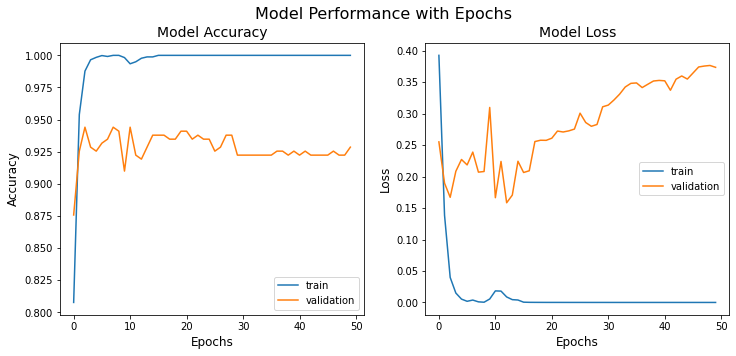

In [ ]:
def accuracy_plot(history):
    
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    
    fig.suptitle('Model Performance with Epochs', fontsize = 16)
    # Subplot 1 
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy', fontsize = 14)
    ax[0].set_xlabel('Epochs', fontsize = 12)
    ax[0].set_ylabel('Accuracy', fontsize = 12)
    ax[0].legend(['train', 'validation'], loc='best')
    
    # Subplot 2
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss', fontsize = 14)
    ax[1].set_xlabel('Epochs', fontsize = 12)
    ax[1].set_ylabel('Loss', fontsize = 12)
    ax[1].legend(['train', 'validation'], loc='best')
    
    
accuracy_plot(history)

## #8.3 Confusion Matrix

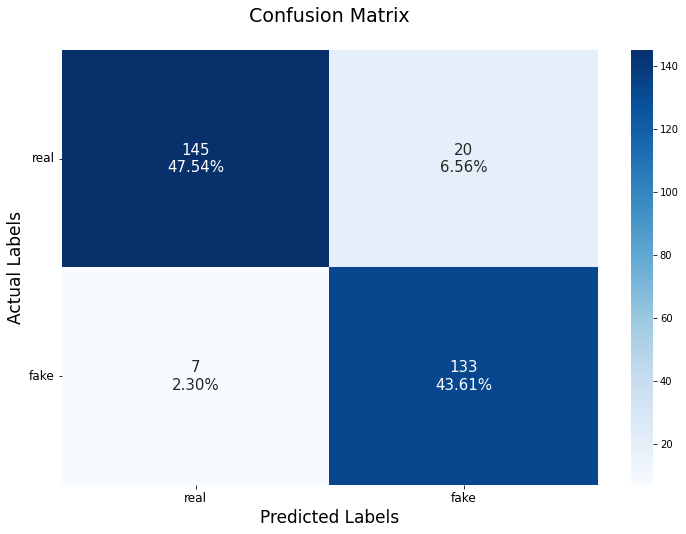

In [ ]:
# Declaring function for plotting confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(model, test_data, test_labels):
    
    products = train_df['label'].unique()
        
    # Calculate predictions
    pred = model.predict(test_data)
    
    # Declaring confusion matrix
    cm = confusion_matrix(np.argmax(np.array(test_labels),axis=1), np.argmax(pred, axis=1))
    
    # Heat map labels

    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(labels_count,labels_count)

    # Plotting confusion matrix
    plt.figure(figsize=(12,8))
    
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=labels, annot_kws={"size": 15}, fmt = '',
                xticklabels = products,
                yticklabels = products)
    
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12, rotation = 'horizontal')
    plt.title('Confusion Matrix\n', fontsize=19)
    plt.xlabel('Predicted Labels', fontsize=17)
    plt.ylabel('Actual Labels', fontsize=17)
    
plot_cm(model, test_data, test_labels)

Model <b>accuracy</b> is verified with confusion matrix. 